<a href="https://colab.research.google.com/github/Mrprey/UFAL/blob/master/Atividade_semana3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/



# Leitura do dataset

In [ ]:
giimport pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSets/heart_failure.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



# Re-escala dos dados

In [ ]:
data = (data - data.min())/(data.max()-data.min())

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


# Organizando dados para modelagem

In [ ]:
X = data.iloc[:,:-1]
y = data.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Algoritimo de rede neural e teste

In [ ]:
#modelo
classificador = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#treinando
classificador.fit(X_train,y_train)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0.])

In [ ]:
#acuracia do algoritimo
acuracia = accuracy_score(y_test,classificacao)
round(acuracia,2)

0.82

É uma acuracia bem baixa, se comparado com os resultados dos dois algotimos já testados

In [ ]:
precisao = precision_score(y_test,classificacao)
round(precisao,2)

0.58

resulta de esperado se comparado com a acuracia e que demonstra ainda mais que o resultado do treinamento não foi efetivo.

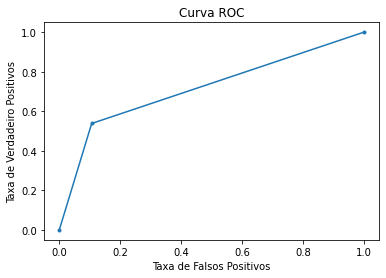

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

# Análise final

depois de completar uma análise rápida sobre os resultados, temos que comparando com o algotimo de RandomForest que tinha tido o melhor resultado, a rede neural não teve bons resultados, ou uma análise melhor sobre os dados e suas interações e importancias podem ter atrapalho o algoritimo ou não seja o melhor algoritimo para este problema. 